# Personalization and Recommendation Sytems - Final Course Project

## Objective

As the "Senior Data Scientists" our objective would be able to build a production grade recommendation system to suggest the next best business according to the users preferneces as understood by their previous ratings.

The dataset that we are working with can be found at: https://www.yelp.com/dataset/challenge

Our baseline models include:
1. Bias model 

To imorove upon thus models we experimented with:
1. Matrix factorization with ALS
2. Time and Location aware models
3. Latent Vector Embeddings with Review text
4. Deep learning models


We intend to focus on key metrics such as coverage, novelty, diversity and serendipity.

## Exploratory Analysis

The data we use to provide these recommendations is the dataset released for the Yelp Challenge.
The dataset identifies users and businesses by their ID. The json files that we chose to work with for our recommendations are the files that provide details about the reviews and ratings as well as the meta data associated with the users and the businesses.

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [6]:
ratings = pd.read_csv("data/ratings.csv")
data = pd.read_csv("python/Allcombineddata.csv")

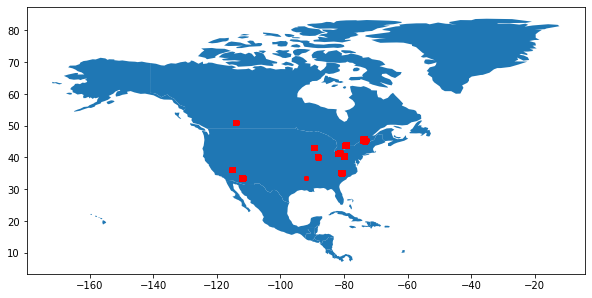

In [9]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent=='North America']
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);



Text(0, 0.5, 'Num')

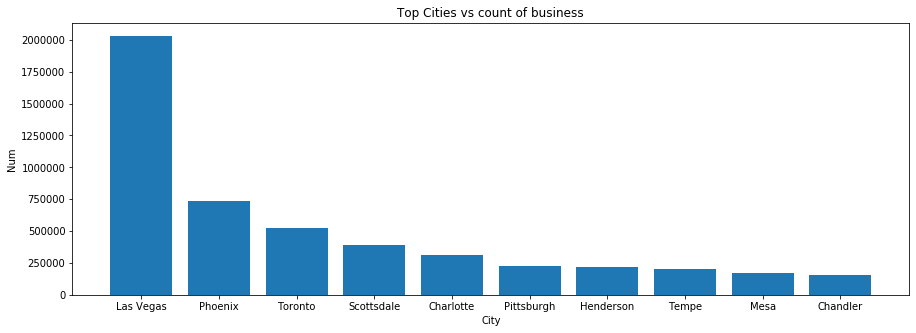

In [11]:
import matplotlib.pyplot as plt
t_city = data.groupby('city').is_open.count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,5))
plt.bar(t_city.iloc[:10]['city'],t_city.iloc[:10]['is_open'])
plt.title('Top Cities vs count of business')
plt.xlabel('City')
plt.ylabel('Num')

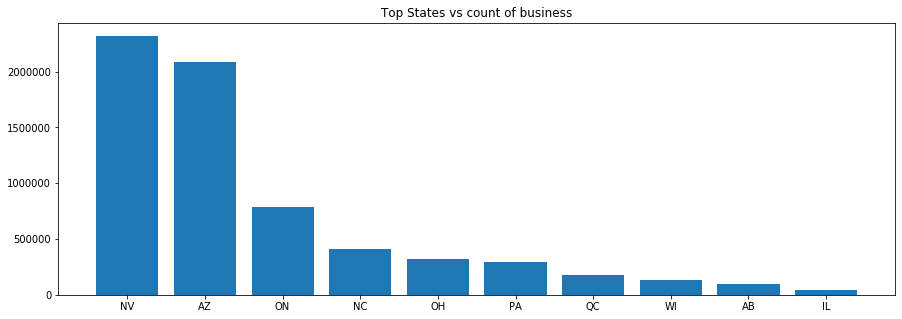

In [12]:
t_state = data.groupby('state').is_open.count().sort_values(ascending=False).reset_index()

#t_city.iloc[:10]
plt.figure(figsize=(15,5))
plt.bar(t_state.iloc[:10]['state'],t_state.iloc[:10]['is_open'])
plt.title('Top States vs count of business')
plt.show()

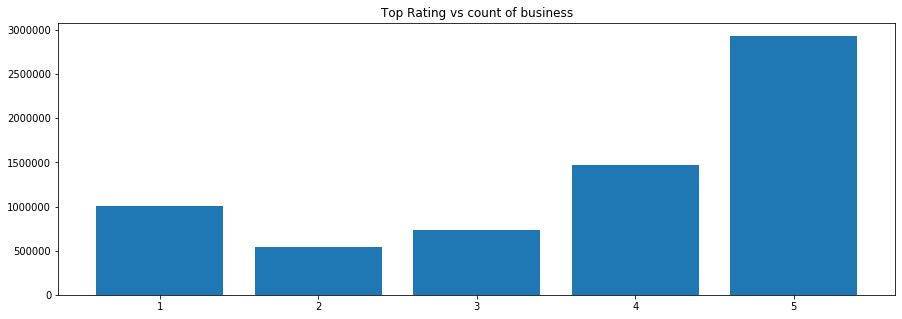

In [13]:
t_rating = data.groupby('rating').is_open.count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,5))
plt.bar(t_rating['rating'],t_rating['is_open'])
plt.title('Top Rating vs count of business')
plt.show()

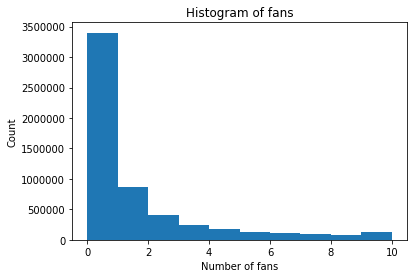

In [15]:
plt.hist(data.fans[data.fans<=10])
plt.title('Histogram of fans')
plt.xlabel('Number of fans')
plt.ylabel('Count')
plt.show()

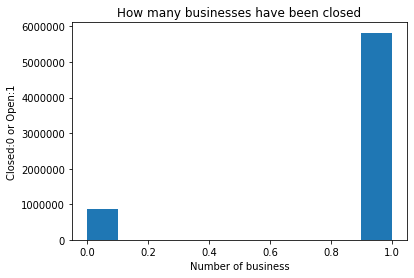

In [17]:
plt.hist(data['is_open'])
plt.title('How many businesses have been closed')
plt.xlabel('Number of business')
plt.ylabel('Closed:0 or Open:1')
plt.show()

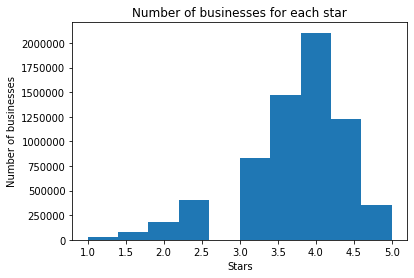

In [19]:
plt.hist(data.stars)
plt.title('Number of businesses for each star')
plt.ylabel('Number of businesses')
plt.xlabel('Stars')
plt.show()

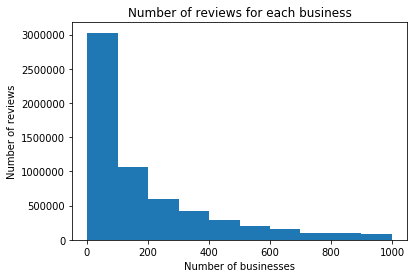

In [21]:
plt.hist(data.review_count_x[data.review_count_x<1000])
plt.title('Number of reviews for each business')
plt.xlabel('Number of businesses')
plt.ylabel('Number of reviews')
plt.show()

## Baseline model

We first fit a bias only model to the data to set a benchmark for baseline model.
This model only utilizes item and user bias to recommend businesses.

In [ ]:
#code to call data and plot 

Pros:
1. Easy to implement
2. Reproducible
3. Fast
   
Cons:    
1. Doesnt capture interaction 

## Models

### Matrix Factorization for ALS :

We are utilizing only the ratings data, that includes business ID, user ID and ratings without any meta data.
We built a Matrix Factorization model using ALS method, and iterate over different rank ranges to find the optimal rank.

In [ ]:
#code to call data and plot 

Pros:
1. Easy to implement
2. Interpretabile (for small latent space and non-negative)
    
Cons: 
1. Doesnt utilize any meta data available 
2. Memory inefficient 
3. Slow

### Time and Location aware models :

We decided to include meta data available to us about the businesses to see if they impact the recommendations.

1. Location Aware models:

We discount the rating for far off businesses by their distance from the users average location ( average of all the locations the user has provided ratings for). 
The ran an SVD++ model on the data includes this discounting factor as one of the features.


1. Time Aware models:

We discount the rating for businesses that were further back in time than their most recent ratings.  
The ran an SVD++ model on the data includes this discounting factor as one of the features.



In [ ]:
#code to call data and plot 

Pros:
1. Takes meta data into account
2. Places emphasis on time and location explicitly (penalizes far and old ratings)
3. Easy to implement
4. Interpretabile (for small latent space and non-negative)
    
Cons:  
1. Doesnt utilize any meta data available 
2. Memory inefficient 
3. Slow  

###  Latent Vector Embeddings with Review text :

Since the reviews are text data and we have more detailed opinions of the users and descriptions of the businesses, we decided to use them as latent vector embeddings to represent users and businesses.

Each user is assigned the vector representation that is an average of all the reviews given by him. <br>
Each business is assigned a vector representation that is an average of all the reviews given to it.

Similarities are calculated based on these representation of users and businesses.

In [ ]:
#code to call data and plot 

Pros:
1. Able to capture information latent in text reviews   
    
Cons:
1. Slow
2. Memory hungry


### Deep Learning Models :

Deep Neural network architectures that utilise the meta data as features to predict the rating for each user-business pair.

First we establish a baseline model with the features that include only the user ID and business ID.
Second we append information about the business as the input which uplifted our accuracy by 100%.
Third we also append user information to the input , to train the model on all the information we have availble on the users and businesses.


User-Business ID's only:

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
ratings = pd.read_csv("data/ratings.csv")
business  = pd.read_csv("python/business.csv")
data = pd.read_csv("python/Allcombineddata.csv")

Train on 5348720 samples, validate on 1337180 samples
Epoch 1/10
5348720/5348720 [==============================] - 14s 3us/step - loss: 53686780.7440 - mse: 53686488.0000 - val_loss: 49.2993 - val_mse: 49.2993
Epoch 2/10
5348720/5348720 [==============================] - 15s 3us/step - loss: 22.1635 - mse: 22.1635 - val_loss: 65.9742 - val_mse: 65.9743
Epoch 3/10
5348720/5348720 [==============================] - 17s 3us/step - loss: 545.4751 - mse: 545.4763 - val_loss: 7.5593 - val_mse: 7.5593
Epoch 4/10
5348720/5348720 [==============================] - 18s 3us/step - loss: 418.2509 - mse: 418.2507 - val_loss: 114.6156 - val_mse: 114.6155
Epoch 5/10
5348720/5348720 [==============================] - 17s 3us/step - loss: 80.9160 - mse: 80.9160 - val_loss: 3.3432 - val_mse: 3.3432
Epoch 6/10
5348720/5348720 [==============================] - 11s 2us/step - loss: 5.7567 - mse: 5.7567 - val_loss: 2.2536 - val_mse: 2.2536
Epoch 7/10
5348720/5348720 [==============================] - 11s 

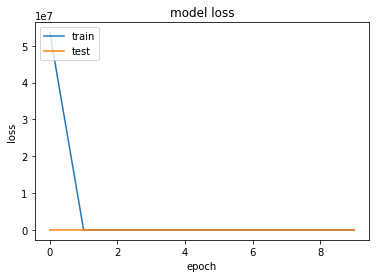

In [9]:
from python.DL_Baseline import DL_Model
DL_Model(ratings,None)

Train on 5348720 samples, validate on 1337180 samples
Epoch 1/10
5348720/5348720 [==============================] - 11s 2us/step - loss: 22690128.0854 - mse: 22689476.0000 - val_loss: 275.5661 - val_mse: 275.5663
Epoch 2/10
5348720/5348720 [==============================] - 13s 2us/step - loss: 52672.5217 - mse: 52672.5742 - val_loss: 6107.2854 - val_mse: 6107.2871
Epoch 3/10
5348720/5348720 [==============================] - 15s 3us/step - loss: 70641.2082 - mse: 70641.3516 - val_loss: 328.4689 - val_mse: 328.4689.
Epoch 4/10
5348720/5348720 [==============================] - 9s 2us/step - loss: 59913.6230 - mse: 59913.6133 - val_loss: 132.4822 - val_mse: 132.4822
Epoch 5/10
5348720/5348720 [==============================] - 10s 2us/step - loss: 46629.9678 - mse: 46630.0547 - val_loss: 183.1205 - val_mse: 183.1206
Epoch 6/10
5348720/5348720 [==============================] - 10s 2us/step - loss: 40704.8707 - mse: 40704.8750 - val_loss: 35249.3755 - val_mse: 35249.3633
Epoch 7/10
53487

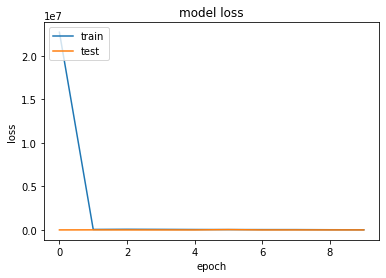

NameError: name 'plt' is not defined

In [8]:
from python.DL_Baseline import DL_Model
merged = pd.merge(left=ratings,right=business,on='business_id', how='left')
DL_Model(merged,"Business")
plt.show()

Train on 5348720 samples, validate on 1337180 samples
Epoch 1/10
5348720/5348720 [==============================] - 15s 3us/step - loss: 122873.6556 - mse: 122874.2266 - val_loss: 1074.2732 - val_mse: 1074.2739
Epoch 2/10
5348720/5348720 [==============================] - 15s 3us/step - loss: 3260.6723 - mse: 3260.6731 - val_loss: 111.3384 - val_mse: 111.3385
Epoch 3/10
5348720/5348720 [==============================] - 15s 3us/step - loss: 203.5094 - mse: 203.5094 - val_loss: 180.1105 - val_mse: 180.1107
Epoch 4/10
5348720/5348720 [==============================] - 14s 3us/step - loss: 91.5215 - mse: 91.5214 - val_loss: 9.8347 - val_mse: 9.8347
Epoch 5/10
5348720/5348720 [==============================] - 14s 3us/step - loss: 6.7285 - mse: 6.7285 - val_loss: 2.3145 - val_mse: 2.3145
Epoch 6/10
5348720/5348720 [==============================] - 13s 3us/step - loss: 2.3316 - mse: 2.3316 - val_loss: 2.1669 - val_mse: 2.1669
Epoch 7/10
5348720/5348720 [==============================] - 13

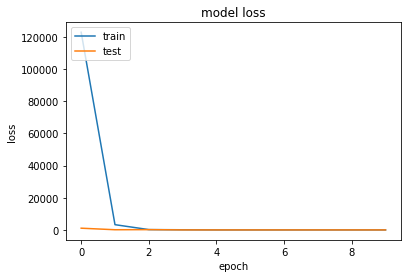

In [6]:
DL_Model(data,"Both")
plt.show()

Pros:
1. Able to capture latent behaviour
2. Able to capture complex interactions

Cons:
1. Non-Interpretable


## Results:


To evaluate our models, we tested them along the latest rating given by each user.
The metrics that we chose to focus on are the following :
   
1. RMSE :

2. Novelty:
3. Serendipity: <br>

4. Coverage: <br>
Coverage represents the percentage of things (items, users, or ratings) that the recommender system was able to recommend
    
We have relied on the functions defined by ..... (hermes.py) for the calculation of metrics and updated them to be compatible with the latest version of Spark and Python3.  
    

## Conclusions: